In [167]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng

rng = default_rng()

def standard_deviation_for_uniform(start_k, max_k, step = 1, n = 10000, iterations = 100, theta = 1):
    num_of_ks = len(range(start_k, max_k, step))
    deviations = np.zeros(num_of_ks)
    
    for _ in range(iterations):
        sums = np.zeros(num_of_ks)
        for x in rng.uniform(0, theta, size=n):
            cur = (x ** start_k) / n
            multiplier = x ** step
            for i in range(0, num_of_ks):
                sums[i] += cur
                cur *= multiplier

        i = 0
        for k in range(start_k, max_k, step):
            deviations[i] += ((((sums[i] * (k + 1)) ** (1.0 / k)) - theta) ** 2) / iterations
            i += 1

    return deviations

def standard_deviation_for_exp(start_k, max_k, step = 1, n = 10000, iterations = 100, theta = 1):
    num_of_ks = len(range(start_k, max_k, step))
    deviations = np.zeros(num_of_ks)
    
    for _ in range(iterations):
        sums = np.zeros(num_of_ks)
        for x in rng.exponential(size=n):
            x *= theta
            cur = (x ** start_k) / n
            multiplier = x ** step
            for i in range(0, num_of_ks):
                sums[i] += cur
                cur *= multiplier

        i = 0
        fac = np.math.factorial(start_k)
        for k in range(start_k, max_k, step):
            deviations[i] += ((((sums[i]/fac) ** (1.0 / k)) - theta) ** 2) / iterations
            i += 1
            for j in range(k + 1, k + step + 1):
                fac *= j

    return deviations

def draw_uniform(l, r, step, n = 10000, iterations = 100):
    ks = np.arange(l,r,step)    # start,stop,step
    y = standard_deviation_for_uniform(l,r,step, n, iterations) 
    plt.plot(ks, y)
    plt.yscale('log') 
    plt.show()
    
def draw_exp(l, r, step, n = 10000, iterations = 100):
    ks = np.arange(l,r,step)    # start,stop,step
    y = standard_deviation_for_exp(l,r,step, n, iterations) 
    plt.plot(ks, y)
    plt.yscale('log') 
    plt.show()

Для Exp[theta] лучше брать k = 1

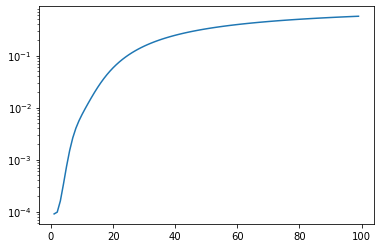

In [187]:
draw_exp(1, 100, 1)

Для U[0, theta] k чем больше, тем лучше

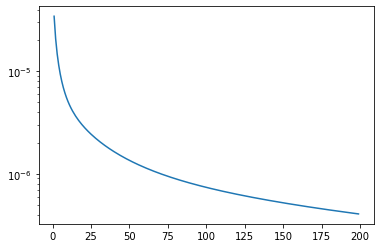

In [189]:
draw_uniform(1, 200, 1)

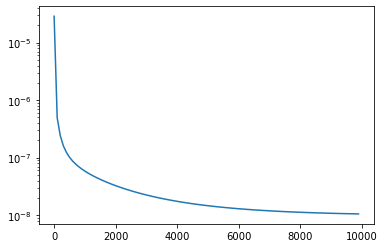

In [188]:
draw_uniform(1, 10000, 100)